In [ ]:
pip install tomotopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 40.2 MB/s eta 0:00:00


In [ ]:
import re
import sys
import string
import tomotopy as tp
from tomotopy import TermWeight
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/Colab Notebooks/datasets_final/baselinetext_training.csv'
file_path = '/content/drive/My Drive/Colab Notebooks/Extras/data_combined.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path, encoding="utf-8", encoding_errors="ignore")
#df = df.dropna(subset=['text_manual']).reset_index(drop=True)
df = df.dropna(subset=['Combined Text']).reset_index(drop=True)
df = df.dropna(subset=['used-treatment']).reset_index(drop=True)
df

,Prefix,Combined Text,account_id,in_person,account_status,days of data,Tracking,age,gender,phone,...,little-interest-or-pleasure,feeling-depressed,trouble-sleeping,feeling-tired,appetite,feeling-bad-about-self,trouble-concentrating,slow-fast-speaking,suicidal-thoughts,impact-on-your-life
0,u00000003,I came outside to let our big dog off of his r...,3,online,app_installed,32.0,FINISHED,54,Female,Android,...,1.0,1.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,Very difficult
1,u00000008,"I started hearing voices probably, oh, I don't...",8,online,app_installed,24.0,FINISHED,39,Female,Android,...,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,Very difficult
2,u00000032,Hello. My name is Nikita and the voices that I...,32,online,app_installed,3.0,LOST TO FOLLOW UP,37,Female,Android,...,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,Somewhat difficult
3,u00000044,"I feel, um, very alone. Um, voices are telling...",44,online,app_installed,12.0,LOST TO FOLLOW UP,57,Male,Android,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,3.0,Very difficult
4,u00000050,"Hi. My name's, uh, Adam Mobley. Um, I've been ...",50,online,study_finished,31.0,FINISHED,37,Male,Android,...,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,Extremely difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,u00002393,"I was sitting there watching TV, a movie and I...",2393,online,app_installed,33.0,FINISHED,48,Male,Android,...,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Somewhat difficult
321,u00002400,"Um, the voices started, uh, when I got in my c...",2400,online,app_installed,33.0,FINISHED,44,Female,Android,...,1.0,1.0,2.0,2.0,1.0,1.0,3.0,0.0,0.0,Somewhat difficult
322,u00002402,"\n\n I'm, I'm watching, uh, Phil Donahue in, u...",2402,online,study_finished,32.0,FINISHED,2221961,Female,Android,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0,Somewhat difficult
323,u00002430,They keep - I keep trying to talk out loud to ...,2430,online,app_installed,31.0,FINISHED,21,Other,Android,...,1.0,2.0,0.0,2.0,1.0,3.0,2.0,0.0,2.0,Somewhat difficult


In [ ]:
df = df[df['Tracking'] != 'GAMER']
df = df[df['Tracking'] != 'TEST']

In [ ]:
used_treatment = df[['Combined Text', 'used-treatment']]
used_treatment = pd.DataFrame(used_treatment)
used_treatment['used-treatment'] = used_treatment['used-treatment'].astype(int)
used_treatment['Combined Text'] = used_treatment['Combined Text'].astype(str)
used_treatment.reset_index(drop=True)
used_treatment

,Combined Text,used-treatment
0,I came outside to let our big dog off of his r...,0
1,"I started hearing voices probably, oh, I don't...",0
2,Hello. My name is Nikita and the voices that I...,0
3,"I feel, um, very alone. Um, voices are telling...",1
4,"Hi. My name's, uh, Adam Mobley. Um, I've been ...",1
...,...,...
320,"I was sitting there watching TV, a movie and I...",1
321,"Um, the voices started, uh, when I got in my c...",0
322,"\n\n I'm, I'm watching, uh, Phil Donahue in, u...",1
323,They keep - I keep trying to talk out loud to ...,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(used_treatment[['Combined Text']], used_treatment['used-treatment'], test_size=0.3, random_state=42)

In [ ]:
train_df = pd.DataFrame({'col1': x_train['Combined Text'], 'used-treatment': y_train})

test_df = pd.DataFrame({'col1': x_test['Combined Text'], 'used-treatment': y_test})


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


stopWords = set(stopwords.words('english'))
custom_stopwords = ["iãåâ","ive", "thats", "theres", "got", "gon", "na", "get", "uh", "um", "theyre", "youve", "itbs", "hat", "ibm", "donbt", "would", "could", "didnt"]

def preprocess_text(text):
  # Lowercase text
  text = text.lower()

  # Tokenize text
  words = nltk.word_tokenize(text)

    # Lemmatization (new)
  lemmatizer = WordNetLemmatizer()
  lemmed_words = [lemmatizer.lemmatize(word) for word in words]

  # Perform POS tagging
  pos_tags = nltk.pos_tag(lemmed_words)

  # Filter words based on stopwords and POS tags
  wordsFiltered = [word for word, pos in pos_tags if word not in stopWords and
                   word not in custom_stopwords and is_valid_pos(pos)]
  return wordsFiltered

# Helper function to identify valid POS tags (verbs, adjectives, nouns)
def is_valid_pos(pos_tag):
  """
  This function checks if a word has a valid POS tag (verb, adjective, noun).
  """
  valid_pos_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ",  # Verbs
                    "JJ", "JJR", "JJS",                        # Adjectives
                    "NN", "NNS", "NNP", "NNPS"]                   # Nouns
  return pos_tag in valid_pos_tags

for _, text, treatment in train_df.itertuples():
  text = re.sub(r'[^\w\s]', "", str(text))  # Remove non-alphanumeric characters
  wordsFiltered = preprocess_text(text)
  print(wordsFiltered)

#for _, text, treatment in train_df.itertuples():
#    text = re.sub(r'[^\w\s]', "", str(text))
#    words = word_tokenize(text)
#    lowered = [w.lower() for w in words]
#    wordsFiltered = [w for w in lowered if w not in stopWords and w not in string.punctuation and w not in custom_stopwords]
#    print(wordsFiltered)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['hello', 'name', 'teresa', 'found', 'study', 'online', 'im', 'happy', 'participate', 'hearing', 'voice', 'month', 'april', 'hospital', 'past', 'month', 'diagnosed', 'kind', 'gave', 'quick', 'paper', 'home', 'said', 'psychotic', 'disorder', 'number', 'go', 'psychiatric', 'place', 'kind', 'cognitive', 'help', 'im', 'problem', 'thinking', 'disorder', 'psychosis', 'zone', 'hear', 'voice', 'im', 'danger', 'anxiety', 'umi', 'hear', 'know', 'shut', 'whatever', 'nothing', 'threatening', 'good', 'kind', 'joke', 'help', 'lot', 'done', 'lot', 'research', 'online', 'try', 'better', 'understand', 'ii', 'dont', 'im', 'interested', 'antipsychotic', 'medication', 'read', 'side', 'effect', 'tremor', 'im', 'keen', 'email', 'tersasu', 'yahoo', 'dot', 'com', 'youd', 'email', 'question', 'imim', 'handling', 'like', 'kind', 'compared', 'story', 'iveive', 'read', 'online', 'ii', 'friend', 'schizophrenic', 'year', 'know', 'hishis', 'story', 'prettypretty', 'good', 'handle', 'im', 'waiting', 'insurance', 'car

In [ ]:
s_lda_model = tp.SLDAModel(tw=TermWeight.IDF, k=4, alpha=0.1, vars = 'b', eta=0.01, rm_top=1)

In [ ]:
stopWords = set(stopwords.words('english'))
custom_stopwords = ["iãåâ","ive", "thats", "theres", "got", "gon", "na", "get", "uh", "um", "theyre", "youve", "itbs", "hat", "ibm", "donbt", "would", "could", "didnt", "youre", "wa", "shes"]

for _, text, treatment in train_df.itertuples():
  text = re.sub(r'[^\w\s]', "", str(text))  # Remove non-alphanumeric characters
  wordsFiltered = preprocess_text(text)

  s_lda_model.add_doc(words=wordsFiltered, y=[treatment])

In [ ]:
s_lda_model.burn_in = 100
s_lda_model.train(0)
print('Num docs:', len(s_lda_model.docs), ', Vocab size:', len(s_lda_model.used_vocabs), ', Num words:', s_lda_model.num_words)
print('Removed top words:', s_lda_model.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 1000, 10):
    s_lda_model.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, s_lda_model.ll_per_word))

s_lda_model.summary()
# print('Saving...', file=sys.stderr, flush=True)
# mdl.save(save_path, True)

for k in range(s_lda_model.k):
    print('Topic #{}'.format(k))
    for word, prob in s_lda_model.get_topic_words(k):
        print('\t', word, prob, sep='\t')

Training...


Num docs: 227 , Vocab size: 10726 , Num words: 181924
Removed top words: ['im']
Iteration: 0	Log-likelihood: -8.730094534118395
Iteration: 10	Log-likelihood: -8.558722854913904
Iteration: 20	Log-likelihood: -8.499864118067647
Iteration: 30	Log-likelihood: -8.458724831829342
Iteration: 40	Log-likelihood: -8.433011652784298
Iteration: 50	Log-likelihood: -8.414692977407396
Iteration: 60	Log-likelihood: -8.39747646680509
Iteration: 70	Log-likelihood: -8.385431670318804
Iteration: 80	Log-likelihood: -8.375266164861825
Iteration: 90	Log-likelihood: -8.365652928218227
Iteration: 100	Log-likelihood: -8.360962917926958
Iteration: 110	Log-likelihood: -8.351611517297583
Iteration: 120	Log-likelihood: -8.345125097521429
Iteration: 130	Log-likelihood: -8.343092189507276
Iteration: 140	Log-likelihood: -8.338040113903523
Iteration: 150	Log-likelihood: -8.33580452625699
Iteration: 160	Log-likelihood: -8.329865909185603
Iteration: 170	Log-likelihood: -8.329209307154246
Iteration: 180	Log-likelihood: -8

In [ ]:
# lemmatize, add stopwords to ema, and then try changing values, pull out transcripts that have topics

s_lda_model.get_topic_word_dist(0)

array([1.10238751e-07, 1.10130273e-07, 1.10197398e-07, ...,
       1.10129456e-07, 1.10129456e-07, 1.10129456e-07], dtype=float32)

In [ ]:
infer_test = "I'm laying in bed right now thinking how the voices have subsided a lot over the last two days. I'm not hearing as much stuff and, um, there's no reason why I need to panic about being hospitalized or whatever. Saw my doctor on Monday and she seems to think I need to up my Abilify, and she said it'll take four weeks for it to make a difference. I've only been on it like four or five days, so it's not gonna make a difference yet, uh, enough to notice. So but I'm happy she made a difference. It's just I'm unhappy 'cause I'm kind of depressed, and she wouldn't Ã¢€“ basically she wouldn't change my antidepressant for another one. So I don't know. She says the Abilify will help the depression. So I'm hoping that the case. Uh, she also gave me Cogentin because I was shaking from the Abilify so that I don't get tremors. She also said that I'm hypo Ã¢€“ I have hypothyroidism possibly which could explain why I'm not shedding any weight even though I've been dieting lately and I was working out regularly. Um, so that's another good thing that maybe they could figure out and I could get on medication and Ã¢€“ but the voices, the voices they're going Ã¢€“ they're going away now completely. And I'm lucky and blessed to say that, and, um, I'm hoping by tomorrow morning when I wake up there's no more voices. That's my goal and my, my hope is that this means that it's going away for good and I don't have to worry about it. That's my hope, and that's all I can say about that. Um, you know, hope, hope is good. Especially when it comes to this, hope is good. And I'm excited for the study to end so I can get my gift card, too. Thanks."
infer_test = re.sub(r'[^\w\s]', "", infer_test)
text = re.sub(r'[^\w\s]', "", str(text))  # Remove non-alphanumeric characters
wordsFiltered = preprocess_text(text)

doc_inst = s_lda_model.make_doc(wordsFiltered, y=[1])
topic_dist, ll = s_lda_model.infer(doc_inst)
used_treatment = s_lda_model.estimate(doc_inst)
print("Topic Distribution for Unseen Docs: ", topic_dist)
print("Log-likelihood of inference: ", ll)
print("Likelihood they were in treatment: ", used_treatment[0])

Topic Distribution for Unseen Docs:  [0.1155054  0.5536875  0.01222321 0.31858158]
Log-likelihood of inference:  -4408.64697265625
Likelihood they were in treatment:  0.6716452


In [ ]:
#file_path1 = '/content/drive/My Drive/Colab Notebooks/datasets_final/baselinetext_test.csv'
#unseen_df = pd.read_csv(file_path1, encoding="utf-8", encoding_errors="ignore")
#used_treatment_unseen = unseen_df[[ 'text_manual', 'used-treatment']]
#used_treatment_unseen

In [ ]:
doc_inst=[]

custom_stopwords = ["iãåâ","ive", "thats", "theres", "got", "gon", "na", "get", "uh", "um", "theyre", "youve", "itbs", "hat", "ibm", "donbt", "would", "could", "didnt"]
for _, text, treatment in test_df.itertuples():
    text = re.sub(r'[^\w\s]', "", str(text))
    wordsFiltered = preprocess_text(text)

    doc_inst.append(s_lda_model.make_doc(words=str(wordsFiltered), y=[treatment]))

topic_dist, ll = s_lda_model.infer(doc_inst)
unseen_in_treatment = s_lda_model.estimate(doc_inst)
print("Topic Distribution for Unseen Docs: ", topic_dist)
print("Log-likelihood of inference: ", ll)
print("Predictions of Treatment of Unseen Docs: ", unseen_in_treatment)

<ipython-input-67-d1aaacf1fd45>:8: RuntimeWarning: `words` should be an iterable of str.
  doc_inst.append(s_lda_model.make_doc(words=str(wordsFiltered), y=[treatment]))


Topic Distribution for Unseen Docs:  [array([8.5133841e-05, 9.9982411e-01, 3.0781157e-05, 8.4850435e-05],
      dtype=float32), array([1.1138102e-03, 9.9737489e-01, 4.0271136e-04, 1.1101415e-03],
      dtype=float32), array([2.7004187e-04, 9.9936479e-01, 9.7636868e-05, 2.6914291e-04],
      dtype=float32), array([2.1095881e-04, 9.9949408e-01, 7.6369623e-05, 2.1025655e-04],
      dtype=float32), array([0.377763  , 0.5698958 , 0.00284624, 0.04949523], dtype=float32), array([8.7880017e-04, 9.7426468e-01, 3.1771825e-04, 2.4539115e-02],
      dtype=float32), array([3.1580642e-04, 9.9926394e-01, 1.1418359e-04, 3.1475513e-04],
      dtype=float32), array([1.7450134e-04, 9.9957365e-01, 6.3161075e-05, 1.7384320e-04],
      dtype=float32), array([1.8241037e-04, 9.9955267e-01, 6.6023247e-05, 1.8188723e-04],
      dtype=float32), array([8.6932949e-04, 9.7613162e-01, 3.1431648e-04, 2.2684459e-02],
      dtype=float32), array([3.7836810e-03, 9.9500215e-01, 3.2320753e-04, 8.9094439e-04],
      dtype=

In [ ]:
s_lda_model.perplexity

3919.1454685326553

In [ ]:
unseen_in_treatment_str = [arr[0] for arr in unseen_in_treatment]
data = list(zip(unseen_in_treatment_str, test_df['used-treatment']))
compare = pd.DataFrame(data, columns=["Predicted", "Actual"])

In [ ]:
compare

,Predicted,Actual
0,0.726705,1
1,0.726701,1
2,0.726701,0
3,0.726699,1
4,0.647049,1
...,...,...
93,0.726705,1
94,0.721810,1
95,0.726703,1
96,0.726599,1


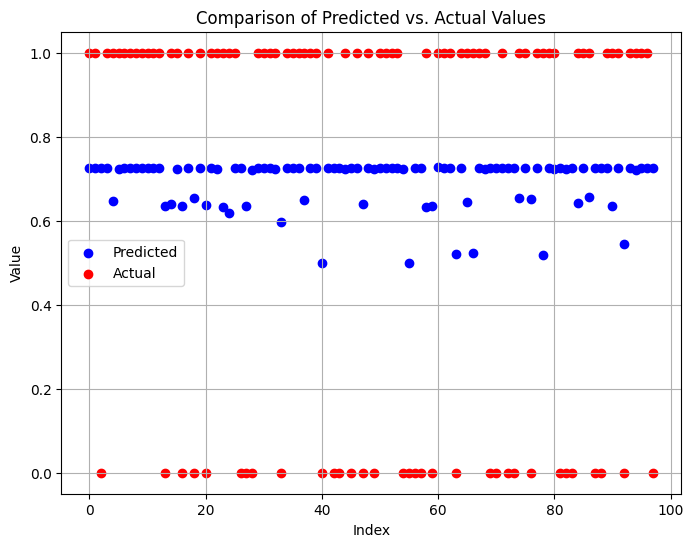

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Color list for the scatter plot (choose colors you prefer)
predicted_color = 'blue'
actual_color = 'red'

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(compare.index, compare['Predicted'], label='Predicted', c=predicted_color)
plt.scatter(compare.index, compare['Actual'], label='Actual', c=actual_color)

# Label the axes
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Predicted vs. Actual Values')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
def threshold_round(value):
  if value > 0.70:
    return 1
  else:
    return 0

compare['Predicted'] = compare['Predicted'].apply(threshold_round)  # Apply function to each value

In [ ]:
compare

,Predicted,Actual
0,1,1
1,1,1
2,1,0
3,1,1
4,0,1
...,...,...
93,1,1
94,1,1
95,1,1
96,1,1


In [ ]:
# Count matches and differences
num_same = (compare['Predicted'] == compare['Actual']).sum()
num_different = len(compare) - num_same

# Print results
print("Number of same values:", num_same)
print("Number of different values:", num_different)

Number of same values: 65
Number of different values: 33


In [ ]:
save_path = '/content/drive/My Drive/Colab Notebooks/in_treatment_model.bin'

s_lda_model.save(save_path)

In [ ]:
#sLDA = tp.HDPModel.load('sample_hdp_model.bin')

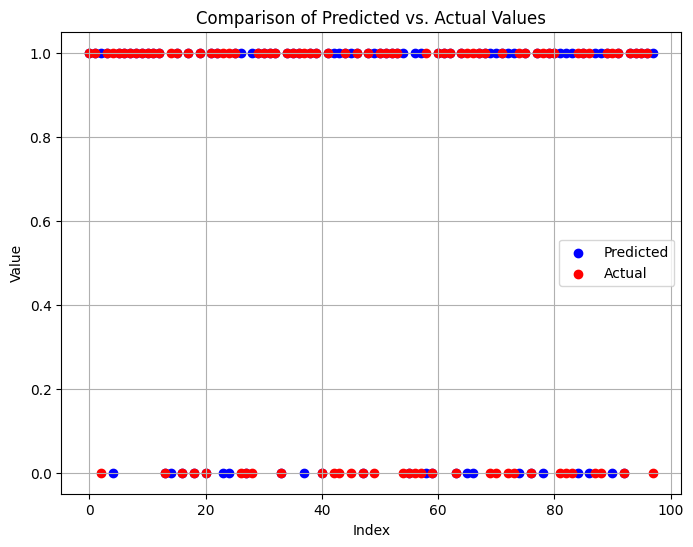

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Color list for the scatter plot (choose colors you prefer)
predicted_color = 'blue'
actual_color = 'red'

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(compare.index, compare['Predicted'], label='Predicted', c=predicted_color)
plt.scatter(compare.index, compare['Actual'], label='Actual', c=actual_color)

# Label the axes
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Predicted vs. Actual Values')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#from tomotopy import HDPModel

#hdp_model = HDPModel(tw=TermWeight.IDF, initial_k=2, alpha=0.5, eta=0.01)
#custom_stopwords = ["ive", "thats", "theres", "dont", "really", "got", "gon", "na", "get", "uh", "um", "theyre", "youve"]

#for _, text, score in train_df.itertuples():
#    text = re.sub(r'[^\w\s]', "", str(text))
#    words = word_tokenize(text)
#    lowered = [w.lower() for w in words]
#    wordsFiltered = [w for w in lowered if w not in stopWords and w not in string.punctuation and w not in custom_stopwords]

#    hdp_model.add_doc(words=wordsFiltered)

#hdp_model.burn_in = 100
#hdp_model.train(0)
#for i in range(0, 1000, 10):
#    hdp_model.train(10)
#    print('Iteration: {}\tLog-likelihood: {}\tNum. of topics: {}'.format(i, hdp_model.ll_per_word, hdp_model.live_k))

#num_of_topics = hdp_model.live_k
#print(num_of_topics)
